# Example of the `aitlas` toolbox in the context of image segmentation

This notebook shows a sample implementation of a image segmentation using the `aitlas` toolbox.

## Import the required packages

In [1]:
from aitlas.datasets import MassachusettsRoadsDataset
from aitlas.models import DeepLabV3
from aitlas.utils import image_loader
from aitlas.transforms import MinMaxNormTransponse

## Visualize images and masks

Total number of patches: 9972


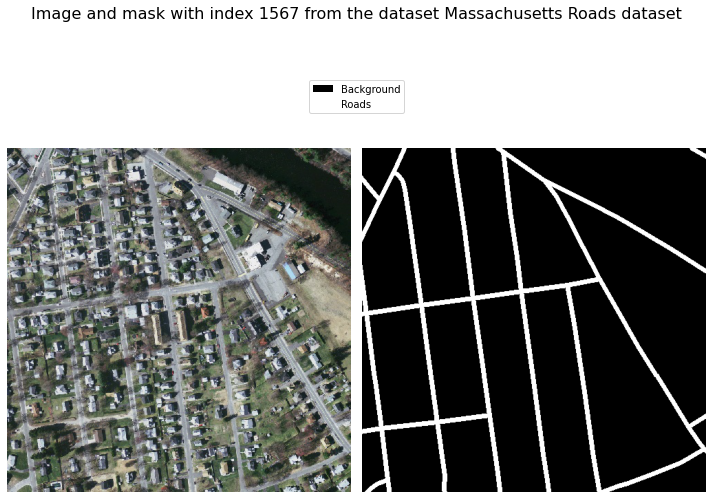

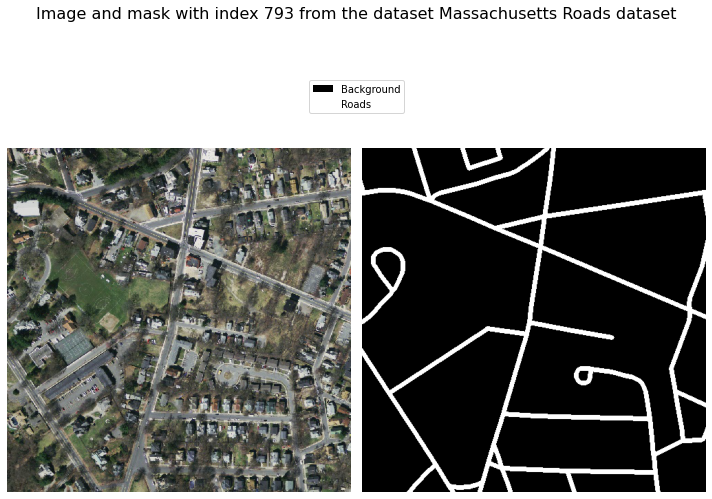

In [2]:
dataset_config = {
    "data_dir": "/media/hdd/semantic-segmentation/MassachusettsRoads/train_splits",
    "csv_file": "/media/hdd/semantic-segmentation/MassachusettsRoads/train.txt"
}
dataset = MassachusettsRoadsDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(1567);
dataset.show_image(793);

## Load train data

In [3]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/media/hdd/semantic-segmentation/MassachusettsRoads/train_splits",
    "csv_file": "/media/hdd/semantic-segmentation/MassachusettsRoads/train.txt",
    "transforms": ["aitlas.transforms.MinMaxNormTransponse"],
    "target_transforms": ["aitlas.transforms.Transponse"]
}
train_dataset = MassachusettsRoadsDataset(train_dataset_config)
len(train_dataset)

9972

## Create the model

In [4]:
epochs = 5
model_directory = "/media/hdd/semantic-segmentation/MassachusettsRoads/experiments"
model_config = {
    "num_classes": 2, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training

In [5]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
)

2021-12-04 13:42:44,359 INFO Starting training.
training: 100%|███████████████████████████| 2493/2493 [2:48:43<00:00,  4.06s/it]
2021-12-04 16:31:29,271 INFO epoch: 1, time: 10124, loss:  0.04551
testing on train set: 100%|█████████████████| 2493/2493 [13:22<00:00,  3.11it/s]
2021-12-04 16:44:52,831 INFO IOU Mean:0.6111263298224873, IOU per Class:0.9609421391564585, 0.26131052048851605
training:  12%|███▍                        | 307/2493 [20:46<2:28:06,  4.07s/it]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

training: 100%|███████████████████████████| 2493/2493 [2:48:33<00:00,  4.06s/it]
2021-12-04 22:35:25,589 INFO epoch: 3, time: 10113, loss:  0.02656
testing on train set: 100%|█████████████████| 2493/2493 [1

training: 100%|███████████████████████████| 2493/2493 [2:48:28<00:00,  4.05s/it]
2021-12-05 01:37:15,214 INFO epoch: 4, time: 10109, loss:  0.02672
testing on train set: 100%|█████████████████| 2493/2493 [13:20<00:00,  3.11it/s]
2021-12-05 01:50:35,985 INFO IOU Mean:0.6804491673975144, IOU per Class:0.9677586187297874, 0.39313971606524134
training: 100%|███████████████████████████| 2493/2493 [2:48:24<00:00,  4.05s/it]
2021-12-05 04:39:00,437 INFO epoch: 5, time: 10105, loss:  0.02596
testing on train set:  57%|█████████▋       | 1415/2493 [07:35<05:47,  3.11it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Evalute the model using test data

In [6]:
test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "/media/hdd/semantic-segmentation/MassachusettsRoads/test_splits",
    "csv_file": "/media/hdd/semantic-segmentation/MassachusettsRoads/test.txt",
    "transforms": ["aitlas.transforms.MinMaxNormTransponse"],
    "target_transforms": ["aitlas.transforms.Transponse"]
}

test_dataset = MassachusettsRoadsDataset(test_dataset_config)
len(test_dataset)

model = DeepLabV3(model_config)
model.prepare()
model_path = "/media/hdd/semantic-segmentation/MassachusettsRoads/experiments/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(["iou"])

2021-12-05 09:58:41,013 INFO Loading checkpoint /media/hdd/semantic-segmentation/MassachusettsRoads/experiments/checkpoint.pth.tar
2021-12-05 09:58:41,442 INFO Loaded checkpoint /media/hdd/semantic-segmentation/MassachusettsRoads/experiments/checkpoint.pth.tar at epoch 6
testing on test set: 100%|████████████████████| 111/111 [00:34<00:00,  3.23it/s]


[{'IOU Mean': 0.6951301814839107,
  'IOU per Class': [0.9713696317067222, 0.41889073126109916]}]

## Predictions

2021-12-05 14:32:42,801 INFO Loading checkpoint /media/hdd/semantic-segmentation/MassachusettsRoads/experiments/checkpoint.pth.tar
2021-12-05 14:32:43,126 INFO Loaded checkpoint /media/hdd/semantic-segmentation/MassachusettsRoads/experiments/checkpoint.pth.tar at epoch 6


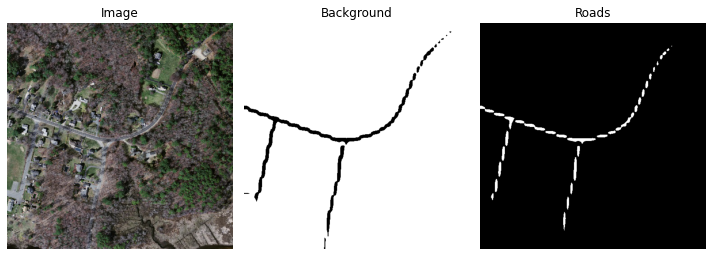

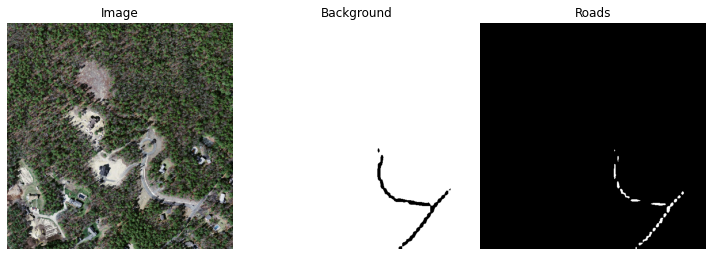

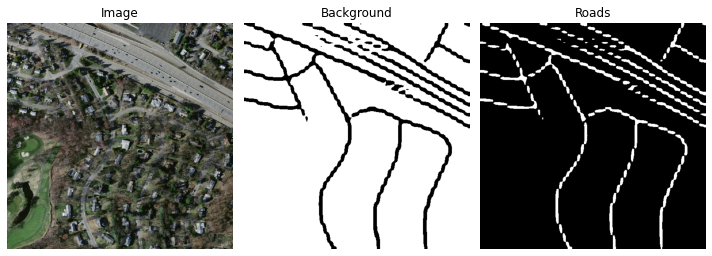

In [10]:
model_path = "/media/hdd/semantic-segmentation/MassachusettsRoads/experiments/checkpoint.pth.tar"
#labels = MassachusettsRoadsDataset.labels
labels = ["Background", "Roads"]
transform = MinMaxNormTransponse()
model.load_model(model_path)

image = image_loader('/media/hdd/semantic-segmentation/MassachusettsRoads/test_splits/26578720_15_3.jpg')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/media/hdd/semantic-segmentation/MassachusettsRoads/test_splits/26278720_15_7.jpg')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/media/hdd/semantic-segmentation/MassachusettsRoads/test_splits/22529065_15_1.jpg')
fig = model.predict_masks(image, labels, transform)